# Rains of Australia

## Загрузка и чтение данных

In [1]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 5.3 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import random as rand

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error, r2_score, mean_squared_error
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV


In [3]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/weatherAUS.csv")

In [5]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


### Сводка данных о датасете

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Некоторые признаки имеют категориальные значения, имеются отсутствующие значения, необходимо провести очистку данных.

## Очистка данных

<ipython-input-14-a8f9ca5b2d50>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["RainTomorrow"], palette=["#C2C4E2", "#EED4E5"])


<Axes: xlabel='RainTomorrow', ylabel='count'>

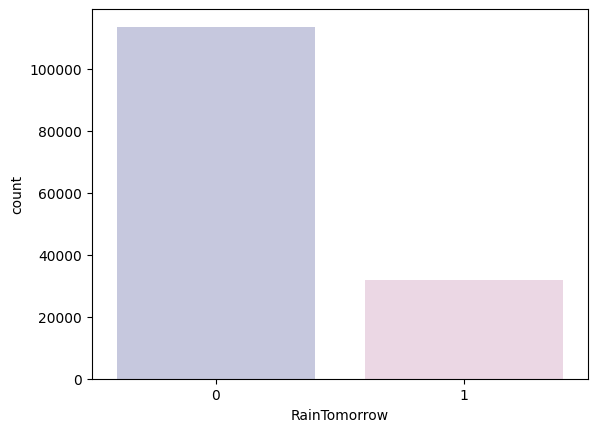

In [14]:
sns.countplot(x=df["RainTomorrow"], palette=["#C2C4E2", "#EED4E5"])

Данные несбалансированы, количество значений "No" значитаельно превышает количество значений Yes.

Преобразование столбца с датой в формат datetime

In [16]:
df['Date'] = pd.to_datetime(df['Date'])

# Преобразование даты  год, месяц и день
df['year'] = df.Date.dt.year
df['month'] = df.Date.dt.month
df['day'] = df.Date.dt.day

def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col] / max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col] / max_val)
    return data

# Кодирование месяца и дня в циклические параметры
df = encode(df, 'month', 12)
df = encode(df, 'day', 31)

Заполним отсутствующие значения

In [18]:
# Замена отсутствующих значений в категориальных переменных модой
object_cols = df.select_dtypes(include='object').columns
for col in object_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Замена отсутствующих значений в числовых переменных медианой
numeric_cols = df.select_dtypes(include='float64').columns
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)


In [9]:
label_encoder = LabelEncoder()
for i in object_cols:
    df[i] = label_encoder.fit_transform(df[i])

features = df.drop(['RainTomorrow', 'Date','day', 'month'], axis=1) # dropping target and extra columns

target = df['RainTomorrow']

col_names = list(features.columns)
s_scaler = StandardScaler()
features = s_scaler.fit_transform(features)
features = pd.DataFrame(features, columns=col_names)

features.describe().T

features["RainTomorrow"] = target


features = features[(features["MinTemp"]<2.3)&(features["MinTemp"]>-2.3)]
features = features[(features["MaxTemp"]<2.3)&(features["MaxTemp"]>-2)]
features = features[(features["Rainfall"]<4.5)]
features = features[(features["Evaporation"]<2.8)]
features = features[(features["Sunshine"]<2.1)]
features = features[(features["WindGustSpeed"]<4)&(features["WindGustSpeed"]>-4)]
features = features[(features["WindSpeed9am"]<4)]
features = features[(features["WindSpeed3pm"]<2.5)]
features = features[(features["Humidity9am"]>-3)]
features = features[(features["Humidity3pm"]>-2.2)]
features = features[(features["Pressure9am"]< 2)&(features["Pressure9am"]>-2.7)]
features = features[(features["Pressure3pm"]< 2)&(features["Pressure3pm"]>-2.7)]
features = features[(features["Cloud9am"]<1.8)]
features = features[(features["Cloud3pm"]<2)]
features = features[(features["Temp9am"]<2.3)&(features["Temp9am"]>-2)]
features = features[(features["Temp3pm"]<2.3)&(features["Temp3pm"]>-2)]


features.shape



(127536, 27)

Удалим строки в которых отсутствует RainTomorrow

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           142193 non-null  datetime64[ns]
 1   Location       142193 non-null  int64         
 2   MinTemp        141556 non-null  float64       
 3   MaxTemp        141871 non-null  float64       
 4   Rainfall       140787 non-null  float64       
 5   Evaporation    81350 non-null   float64       
 6   Sunshine       74377 non-null   float64       
 7   WindGustDir    142193 non-null  int64         
 8   WindGustSpeed  132923 non-null  float64       
 9   WindDir9am     142193 non-null  int64         
 10  WindDir3pm     142193 non-null  int64         
 11  WindSpeed9am   140845 non-null  float64       
 12  WindSpeed3pm   139563 non-null  float64       
 13  Humidity9am    140419 non-null  float64       
 14  Humidity3pm    138583 non-null  float64       
 15  Press

### Разделение данных на признаки и целевую переменную

In [10]:
X = features.drop(["RainTomorrow"], axis=1)
y = features["RainTomorrow"]

# Splitting test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X.shape


(127536, 26)

## Модель knn


Для приведения данных к одному масштабу произведено скалирование с помощью StandartScaler.

In [ ]:
k_range = [3, 5, 7, 9, 11, 13, 15]
algorithms = ['ball_tree', 'kd_tree', 'brute']
metrics = [
    'euclidean',
    'manhattan',
    'minkowski',
    'chebyshev',
    'hamming',
    'canberra',
    'braycurtis'
]

In [ ]:
parameters = {
    'n_neighbors': k_range, # число учитываемых соседей
    'algorithm': algorithms, # алгоритмы поиска соседей
    'weights': ['uniform', 'distance'], # веса соседей
    'leaf_size': [10, 20, 30, 40], # размер листа, используемый в BallTree или KDTree
    'metric': metrics, # метрики расстояния
}

In [ ]:
grid_knn = RandomizedSearchCV(
    KNeighborsClassifier(),
    parameters,
    scoring='f1',
    n_jobs = -1
)
grid_knn.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 215, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py", line 493, in _fit
    self._check_algorithm_metric()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/n

RandomizedSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree',
                                                      'brute'],
                                        'leaf_size': [10, 20, 30, 40],
                                        'metric': ['euclidean', 'manhattan',
                                                   'minkowski', 'chebyshev',
                                                   'hamming', 'canberra',
                                                   'braycurtis'],
                                        'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   scoring='f1')

### Оценка модели

In [ ]:
print(f'Лучшие параметры:\n{grid_knn.best_params_}\n')
print("Показатель f1 для лучшей модели составил: {:.2f}%".
      format(grid_knn.best_score_ * 100) + '\n')

grid_knn_pred = grid_knn.predict(X_test)

print(f'Сравнение метрик: \n{classification_report(y_test, grid_knn_pred)}\n')
print(f'Матрица ошибок: \n{confusion_matrix(y_test, grid_knn_pred)}\n')

Лучшие параметры:
{'weights': 'distance', 'n_neighbors': 5, 'metric': 'manhattan', 'leaf_size': 10, 'algorithm': 'brute'}

Показатель f1 для лучшей модели составил: 55.96%

Сравнение метрик: 
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     20110
           1       0.68      0.49      0.57      5398

    accuracy                           0.84     25508
   macro avg       0.78      0.72      0.74     25508
weighted avg       0.83      0.84      0.83     25508


Матрица ошибок: 
[[18884  1226]
 [ 2740  2658]]



## Метод машин опорных векторов

###Подключение модулей

In [ ]:
from sklearn.svm import SVC

from sklearn.svm import LinearSVC

from sklearn.linear_model import SGDClassifier

###Подбор параметров и обучение модели

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RandomizedSearchCV

# Задаем параметры для подбора
parameters = {
    'penalty': ['none', 'l2', 'l1', 'elasticnet'],
    'alpha': [0.001, 0.01, 0.1, 1],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': [0.01, 0.1, 0.2, 0.5],
    'fit_intercept': [True, False],
    'tol': [1e-3, 1e-4, 1e-5],
    'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
    'l1_ratio': [0.0, 0.25, 0.5, 0.75, 1.0],
    'average': [True, False]
}

# Создаем классификатор SGD
sgd_classifier = SGDClassifier(class_weight='balanced')

# Создаем объект для подбора параметров
grid_svm_sgdc = RandomizedSearchCV(
    sgd_classifier, # используем классификатор SGD
    parameters,     # заданные параметры для подбора
    scoring='f1',   # оценочная метрика
    n_jobs=-1       # количество параллельных задач
)

# Обучаем модель с подобранными параметрами
grid_svm_sgdc.fit(X_train, y_train)

# Выводим лучшие параметры
print("Best parameters:", grid_svm_sgdc.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py", line 891, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-package

Best parameters: {'tol': 0.0001, 'penalty': 'l2', 'loss': 'hinge', 'learning_rate': 'optimal', 'l1_ratio': 0.25, 'fit_intercept': False, 'eta0': 0.2, 'average': True, 'alpha': 0.001}


In [ ]:
# результаты кросс-валидации
print(f'Лучшие параметры:\n{grid_svm_sgdc.best_params_}\n')
print("Показатель f1 для лучшей модели составил: {:.2f}%".
      format(grid_svm_sgdc.best_score_ * 100) + '\n')

# предсказываем результат на тестовой выборке
grid_svm_sgdc_pred = grid_svm_sgdc.predict(X_test)

# оцениваем модель
print(f'Сравнение метрик: \n{classification_report(y_test, grid_svm_sgdc_pred)}\n')
print(f'Матрица ошибок: \n{confusion_matrix(y_test, grid_svm_sgdc_pred)}\n')

Лучшие параметры:
{'tol': 0.0001, 'penalty': 'l2', 'loss': 'hinge', 'learning_rate': 'optimal', 'l1_ratio': 0.25, 'fit_intercept': False, 'eta0': 0.2, 'average': True, 'alpha': 0.001}

Показатель f1 для лучшей модели составил: 57.14%

Сравнение метрик: 
              precision    recall  f1-score   support

           0       0.94      0.69      0.80     20110
           1       0.42      0.84      0.56      5398

    accuracy                           0.72     25508
   macro avg       0.68      0.76      0.68     25508
weighted avg       0.83      0.72      0.75     25508


Матрица ошибок: 
[[13916  6194]
 [  884  4514]]



## Линейная и логистическая регрессия


### Линейная регрессия

In [ ]:
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import ElasticNet

from sklearn.linear_model import Lasso

from sklearn.linear_model import Ridge

from sklearn.linear_model import SGDRegressor

from sklearn.linear_model import LogisticRegression

In [ ]:
%%time

# создаем модель
regression_linear = LinearRegression()

# подаем на вход модели обучающие данные
regression_linear.fit(X_train, y_train)

CPU times: user 209 ms, sys: 0 ns, total: 209 ms
Wall time: 208 ms


LinearRegression()

In [ ]:
%%time
regression_linear_pred = regression_linear.predict(X_test)

# заводим
mae = mean_absolute_error(y_test, regression_linear_pred)
mse = mean_squared_error(y_test, regression_linear_pred)

# оцениваем модель
print(f'MAE: {mae:.5f}')
print(f'MSE: {mse:.5f}')
print(f'RMSE: {np.sqrt(mse):.5f}')

MAE: 0.25814
MSE: 0.11657
RMSE: 0.34143
CPU times: user 12.4 ms, sys: 0 ns, total: 12.4 ms
Wall time: 11.4 ms


### Логистическая регрессия

In [ ]:
%%time

# задаем диапазон параметров
parameters = {
    'penalty': ['l1', 'l2'], # тип регуляризации
    'C': [0.001, 0.01, 0.1, 1, 10], # инверсное значение коэффициента регуляризации
    #'fit_intercept': [True, False], # следует ли добавлять константный член в линейную модель
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], # алгоритм оптимизации
    #'tol': [1e-4, 1e-3], # пороговое значение для оптимизации
    #'class_weight': [None, 'balanced'] # веса классов
}

# подбираем лучшие параметры
grid_regression_logistic = RandomizedSearchCV(
    LogisticRegression(),
    parameters,
    scoring='f1',
    n_jobs = -1
)
# обучаем модель
grid_regression_logistic.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

CPU times: user 2.5 s, sys: 810 ms, total: 3.31 s
Wall time: 22.2 s


RandomizedSearchCV(estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='f1')

### Оценка модели

In [ ]:
print(f'Лучшие параметры:\n{grid_regression_logistic.best_params_}\n')
print("Показатель f1 для лучшей модели составил: {:.2f}%".
      format(grid_regression_logistic.best_score_ * 100) + '\n')

grid_regression_logistic_pred = grid_regression_logistic.predict(X_test)

print(f'Сравнение метрик: \n{classification_report(y_test, grid_regression_logistic_pred)}\n')
print(f'Матрица ошибок: \n{confusion_matrix(y_test, grid_regression_logistic_pred)}\n')

Лучшие параметры:
{'solver': 'newton-cg', 'penalty': 'l2', 'C': 10}

Показатель f1 для лучшей модели составил: 56.36%

Сравнение метрик: 
              precision    recall  f1-score   support

           0       0.87      0.94      0.91     20110
           1       0.69      0.47      0.56      5398

    accuracy                           0.84     25508
   macro avg       0.78      0.71      0.73     25508
weighted avg       0.83      0.84      0.83     25508


Матрица ошибок: 
[[18990  1120]
 [ 2848  2550]]



## Метод наивного Байеса

Импортируем классификатор MultinomialNB из модуля sklearn.naive_bayes. Этот классификатор реализует наивный Байесовский классификатор для данных. Гиперпараметр alpha контролирует регуляризацию модели

In [ ]:
from sklearn.naive_bayes import GaussianNB

from sklearn.naive_bayes import MultinomialNB

from sklearn.naive_bayes import ComplementNB

from sklearn.naive_bayes import BernoulliNB

from sklearn.naive_bayes import CategoricalNB

In [ ]:
%%time

# задаем диапазон параметров
parameters = {
    'alpha': [0, 0.001, 0.01, 0.1, 1.0, 10.0], # аддитивное (Лапласа-Лидстоуна) сглаживание
    'force_alpha': [True, False], # применять ли alpha, или ставить в 1e-10
    'binarize': [None, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], # пороговое значение
                                                                               # для бинаризации признаков
    'fit_prior': [True, False], # следует ли использовать приоритеты классов, вычисленные из данных
    #'class_prior': [None] #  вероятности классов, используемые в качестве приоритетов
}


# подбираем лучшие параметры
grid_nb_bernoulli = GridSearchCV(
    BernoulliNB(),
    parameters,
    scoring='f1',
    n_jobs = -1
)
# обучаем модель
grid_nb_bernoulli.fit(X_train, y_train)

CPU times: user 6.24 s, sys: 1.81 s, total: 8.06 s
Wall time: 2min 8s


GridSearchCV(estimator=BernoulliNB(), n_jobs=-1,
             param_grid={'alpha': [0, 0.001, 0.01, 0.1, 1.0, 10.0],
                         'binarize': [None, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                      0.7, 0.8, 0.9, 1.0],
                         'fit_prior': [True, False],
                         'force_alpha': [True, False]},
             scoring='f1')

Оценка производительности модели

In [ ]:
# результаты кросс-валидации
print(f'Лучшие параметры:\n{grid_nb_bernoulli.best_params_}\n')
print("Показатель f1 для лучшей модели составил: {:.2f}%".
      format(grid_nb_bernoulli.best_score_ * 100) + '\n')

# предсказываем результат на тестовой выборке
grid_nb_bernoulli_pred = grid_nb_bernoulli.predict(X_test)

# оцениваем модель
print(f'Сравнение метрик: \n{classification_report(y_test, grid_nb_bernoulli_pred)}\n')
print(f'Матрица ошибок: \n{confusion_matrix(y_test, grid_nb_bernoulli_pred)}\n')

Лучшие параметры:
{'alpha': 10.0, 'binarize': 0.6, 'fit_prior': False, 'force_alpha': True}

Показатель f1 для лучшей модели составил: 55.40%

Сравнение метрик: 
              precision    recall  f1-score   support

           0       0.91      0.75      0.82     20110
           1       0.44      0.71      0.54      5398

    accuracy                           0.75     25508
   macro avg       0.67      0.73      0.68     25508
weighted avg       0.81      0.75      0.76     25508


Матрица ошибок: 
[[15170  4940]
 [ 1556  3842]]



## Метод решающего дерева и случайного леса

### Решающее дерево

Метод решающего дерева строит дерево решений на основе обучающих данных. Каждый узел дерева представляет собой условие на признаке, а каждое ребро представляет собой результат этого условия. В листовых узлах дерева содержатся предсказания



In [ ]:
%%time

# задаем диапазон параметров
parameters = {
    'criterion': ['gini', 'entropy'], # функция для измерения качества разделения
    'splitter': ['best', 'random'], # стратегия выбора признака для разделения
    'max_depth': [None, 10, 20, 30, 40, 50], # максимальная глубина дерева
    #'min_samples_split': [2, 5, 10, 20], # минимальное количество образцов для разделения узла
    #'min_samples_leaf': [1, 2, 5, 10], # минимальное количество образцов для листа
    #'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5], # минимальная доля веса образцов в листе
    'max_features': [None, 'auto', 'sqrt', 'log2'], # количество признаков при поиске лучшего разделения
    #'max_leaf_nodes': [None, 10, 20, 30, 40, 50], # максимальное количество листьев
    #'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5], # минимальное уменьшение неопределенности для разделения
    'class_weight': [None, 'balanced', 'balanced_subsample'], # веса классов
    'ccp_alpha': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5] # параметр для контроля сжатия дерева
}

# подбираем лучшие параметры
grid_ensemble_tree = GridSearchCV(
    DecisionTreeClassifier(),
    parameters,
    scoring='f1',
    n_jobs = -1
)
# обучаем модель
grid_ensemble_tree.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
2880 fits failed out of a total of 8640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2880 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _v

CPU times: user 1min 17s, sys: 19.6 s, total: 1min 37s
Wall time: 1h 19min 19s


GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
                         'class_weight': [None, 'balanced',
                                          'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='f1')

In [ ]:
# результаты кросс-валидации
print(f'Лучшие параметры:\n{grid_ensemble_tree.best_params_}\n')
print("Показатель f1 для лучшей модели составил: {:.2f}%".
      format(grid_ensemble_tree.best_score_ * 100) + '\n')

# предсказываем результат на тестовой выборке
grid_ensemble_tree_pred = grid_ensemble_tree.predict(X_test)

# оцениваем модель
print(f'Сравнение метрик: \n{classification_report(y_test, grid_ensemble_tree_pred)}\n')
print(f'Матрица ошибок: \n{confusion_matrix(y_test, grid_ensemble_tree_pred)}\n')

Лучшие параметры:
{'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'splitter': 'best'}

Показатель f1 для лучшей модели составил: 58.15%

Сравнение метрик: 
              precision    recall  f1-score   support

           0       0.92      0.78      0.84     20110
           1       0.47      0.75      0.58      5398

    accuracy                           0.77     25508
   macro avg       0.70      0.76      0.71     25508
weighted avg       0.83      0.77      0.79     25508


Матрица ошибок: 
[[15610  4500]
 [ 1364  4034]]



### Случайный лес

Метод случайного леса  является ансамблевым методом, который объединяет несколько деревьев решений для классификации или регрессии. Каждое дерево строится на основе подвыборки данных и случайного подмножества признаков. Затем результаты всех деревьев усредняются (для регрессии) или принимается решение путем голосования (для классификации).

In [11]:
%%time

# задаем диапазон параметров
parameters = {
    'n_estimators': [100, 200], # количество деревьев в лесу
    'criterion': ['gini', 'entropy'], # функция для измерения качества разделения
    'max_depth': [None, 50, 100], # максимальная глубина дерева
    'max_features': ['auto', 'sqrt', 'log2'], # количество признаков при поиске лучшего разделения
    'oob_score': [True, False], # следует ли использовать out-of-bag (OOB) оценку для оценки качества модели
    #'class_weight': [None, 'balanced', 'balanced_subsample'], # веса классов
    'ccp_alpha': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5], # параметр контроля сжатия дерева
}

# подбираем лучшие параметры
grid_ensemble_randforest = RandomizedSearchCV(
    RandomForestClassifier(),
    parameters,
    scoring='f1',
    n_jobs = -1
)
# обучаем модель
grid_ensemble_randforest.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


CPU times: user 59.2 s, sys: 5.22 s, total: 1min 4s
Wall time: 46min 11s


RandomizedSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'ccp_alpha': [0.0, 0.1, 0.2, 0.3, 0.4,
                                                      0.5],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 50, 100],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [100, 200],
                                        'oob_score': [True, False]},
                   scoring='f1')

In [13]:
# предсказываем результат на тестовой выборке
grid_ensemble_randforest_pred = grid_ensemble_randforest.predict(X_test)

# оцениваем модель
print(f'Сравнение метрик: \n{classification_report(y_test, grid_ensemble_randforest_pred)}\n')
print(f'Матрица ошибок: \n{confusion_matrix(y_test, grid_ensemble_randforest_pred)}\n')

Сравнение метрик: 
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     20110
           1       0.75      0.48      0.59      5398

    accuracy                           0.86     25508
   macro avg       0.81      0.72      0.75     25508
weighted avg       0.85      0.86      0.84     25508


Матрица ошибок: 
[[19244   866]
 [ 2781  2617]]



## Метод CatBoost

CatBoost - это высокоэффективная библиотека градиентного бустинга, разработанная компанией Яндекс. Она специально оптимизирована для работы с категориальными признаками и автоматически обрабатывает их без необходимости предварительного кодирования.

Гиперпараметры: iterations: количество итераций обучения; learning_rate: скорость обучения; depth - максимальная глубина дерева; border_count: количество корзин для числовых признаков. Этот параметр влияет на скорость обучения и качество модели.

In [ ]:
%%time

# задаем диапазон параметров
# задаем параметры
parameters = {
    'depth': [5, 10], # максимальная глубина дерева
    'learning_rate': [0.01, 0.1], # скорость обучения
    'iterations': [10, 100], # количество итераций
    'l2_leaf_reg': [1, 10], # коэффициент L2 регуляризации листьев
    'border_count': [1, 255], # количество границ для числовых признаков
    'loss_function': ['Logloss', 'CrossEntropy', 'MultiClass', 'MultiClassOneVsAll'], # функция потерь
    'random_strength': [0, 1], # сила случайности в выборе признаков на каждом уровне
    'bagging_temperature': [0, 1], # температура для баггинга
    'od_type': ['IncToDec', 'Iter', 'None'], # тип оптимизации
    'od_wait': [10, 100] # количество итераций между проверками оптимизации
}

# подбираем лучшие параметры
grid_catboost = RandomizedSearchCV(
    CatBoostClassifier(),
    parameters,
    scoring='f1',
    n_jobs = -1
)
# обучаем модель
grid_catboost.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


0:	learn: 0.6200791	total: 167ms	remaining: 16.5s
1:	learn: 0.5655463	total: 264ms	remaining: 12.9s
2:	learn: 0.5193106	total: 360ms	remaining: 11.7s
3:	learn: 0.4840942	total: 465ms	remaining: 11.1s
4:	learn: 0.4559861	total: 564ms	remaining: 10.7s
5:	learn: 0.4343461	total: 662ms	remaining: 10.4s
6:	learn: 0.4185209	total: 765ms	remaining: 10.2s
7:	learn: 0.4049521	total: 858ms	remaining: 9.87s
8:	learn: 0.3949680	total: 957ms	remaining: 9.68s
9:	learn: 0.3879397	total: 1.06s	remaining: 9.53s
10:	learn: 0.3807925	total: 1.17s	remaining: 9.47s
11:	learn: 0.3745913	total: 1.27s	remaining: 9.34s
12:	learn: 0.3697771	total: 1.37s	remaining: 9.18s
13:	learn: 0.3656042	total: 1.47s	remaining: 9.02s
14:	learn: 0.3621814	total: 1.57s	remaining: 8.88s
15:	learn: 0.3586145	total: 1.67s	remaining: 8.75s
16:	learn: 0.3558318	total: 1.76s	remaining: 8.6s
17:	learn: 0.3529630	total: 1.86s	remaining: 8.47s
18:	learn: 0.3505055	total: 1.96s	remaining: 8.34s
19:	learn: 0.3481100	total: 2.06s	remainin

RandomizedSearchCV(estimator=<catboost.core.CatBoostClassifier object at 0x7a0510c2f2e0>,
                   n_jobs=-1,
                   param_distributions={'bagging_temperature': [0, 1],
                                        'border_count': [1, 255],
                                        'depth': [5, 10],
                                        'iterations': [10, 100],
                                        'l2_leaf_reg': [1, 10],
                                        'learning_rate': [0.01, 0.1],
                                        'loss_function': ['Logloss',
                                                          'CrossEntropy',
                                                          'MultiClass',
                                                          'MultiClassOneVsAll'],
                                        'od_type': ['IncToDec', 'Iter', 'None'],
                                        'od_wait': [10, 100],
                                        'random_strength': [0, 1]},
                   scoring='f1')

In [ ]:
# результаты кросс-валидации
print(f'Лучшие параметры:\n{grid_catboost.best_params_}\n')
print("Показатель f1 для лучшей модели составил: {:.2f}%".
      format(grid_catboost.best_score_ * 100) + '\n')

# предсказываем результат на тестовой выборке
grid_catboost_pred = grid_catboost.predict(X_test)

# оцениваем модель
print(f'Сравнение метрик: \n{classification_report(y_test, grid_catboost_pred)}\n')
print(f'Матрица ошибок: \n{confusion_matrix(y_test, grid_catboost_pred)}\n')

Лучшие параметры:
{'random_strength': 1, 'od_wait': 100, 'od_type': 'IncToDec', 'loss_function': 'CrossEntropy', 'learning_rate': 0.1, 'l2_leaf_reg': 1, 'iterations': 100, 'depth': 10, 'border_count': 255, 'bagging_temperature': 0}

Показатель f1 для лучшей модели составил: 62.72%

Сравнение метрик: 
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     22098
           1       0.75      0.53      0.62      6341

    accuracy                           0.86     28439
   macro avg       0.81      0.74      0.77     28439
weighted avg       0.85      0.86      0.85     28439


Матрица ошибок: 
[[20963  1135]
 [ 2985  3356]]

